# Line Chart of NOAA Record High and Low Temperatures (2005-2014)
## Scatterplot of Record Breaking Days in 2015


An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    plt.show()

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [4]:
# Libraries
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import datetime as dt       
from matplotlib import dates, pyplot

In [5]:
def explore():
    df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    minDate = min(df['Date'])
    maxDate = max(df['Date'])
    df['MD'] = df['Date'].apply(lambda x: x.strftime('%m-%d'))
    dfSummary = df.groupby('MD')['Data_Value'].agg([np.min, np.max])
    return(minDate, maxDate,df, dfSummary)


In [65]:
def process():
    df = explore()[2]
    
    # Filter out leap days    
    df = df.loc[df["MD"] != "02-29"]
    
    # Filter out 2015 data
    df1 = df[(df['Date'] > dt.date(2004, 12, 31)) & (df['Date'] < dt.date(2015, 1, 1))]    
    df2 = df[(df['Date'] > dt.date(2014, 12, 31)) & (df['Date'] < dt.date(2016, 1, 1))] 
    
    # Create minimum and maximum data
    df1 = df1.groupby('MD')['Data_Value'].agg([np.min, np.max])
    df2 = df2.groupby('MD')['Data_Value'].agg([np.min, np.max]) 
    
    # Add DOY variable
    df1['DOY'] = np.arange(1,len(df1)+1)
    df2['DOY'] = np.arange(1,len(df2)+1)
    
    # Merge the data sets
    df3 = pd.merge(df1, df2, how = 'inner', left_index = True, right_index = True)    
    
    # Create record low/high data set
    dfLow = df3.loc[df3['amin_x'] > df3['amin_y']]
    dfHigh = df3.loc[df3['amax_x'] < df3['amax_y']]
    df1 = df1.reset_index()
    dfLow = dfLow.reset_index()
    dfHigh = dfHigh.reset_index()
    return(df1, dfLow, dfHigh)

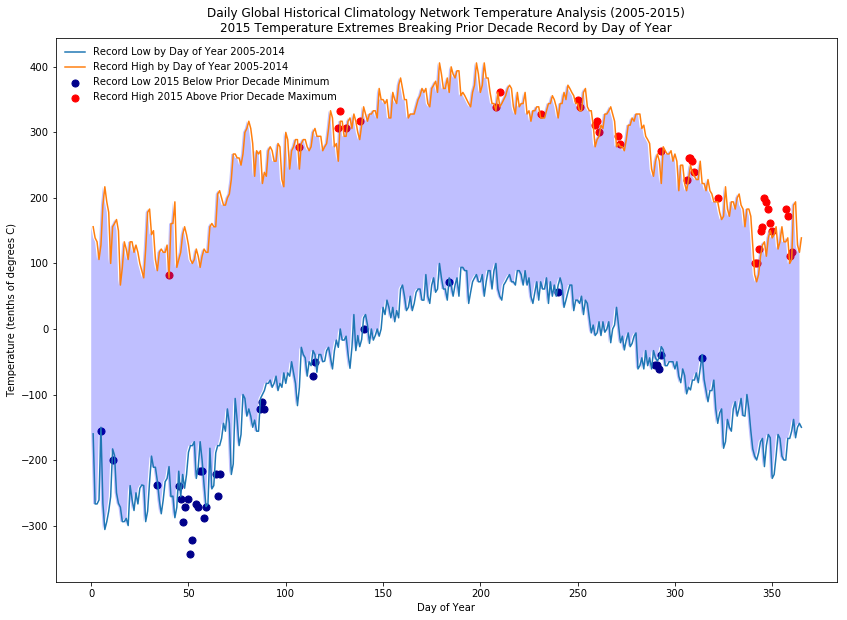

In [69]:
# Prepare Data for Line Plots
# Obtain data 
df, low, high = process()
    
# Prepare data for line plotting
xAxis = df['DOY']
yLow = df['amin']
yHigh = df['amax']
    
# Prepare data for scatterplot
xLow2015 = low.loc[:,['DOY_y']]
yLow2015 = low.loc[:,['amin_y']]
xHigh2015 = high.loc[:,['DOY_y']]
yHigh2015 = high.loc[:,['amax_y']]

# Render plots
plt.figure(figsize = (14,10))
plt.plot(xAxis, yLow, '-', xAxis, yHigh, '-')
plt.xlabel('Day of Year')
plt.ylabel('Temperature (tenths of degrees C)')
plt.title(r'Daily Global Historical Climatology Network Temperature Analysis (2005-2015)'
         + '\n' + '2015 Temperature Extremes Breaking Prior Decade Record by Day of Year')
plt.scatter(xLow2015, yLow2015, s = 50, c = 'darkblue')
plt.scatter(xHigh2015, yHigh2015, s = 50, c = 'red')

plt.legend(['Record Low by Day of Year 2005-2014', 'Record High by Day of Year 2005-2014',
           'Record Low 2015 Below Prior Decade Minimum', 'Record High 2015 Above Prior Decade Maximum'],
          frameon = False)
plt.gca().fill_between(range(len(yLow)),
                      yLow, yHigh,
                      facecolor = 'blue', alpha = 0.25)
plt.savefig('w2.png')
plt.show()